In [46]:
import numpy as np
import json
import sys
import os
import mayavi
import h5py
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10,8]


with open('setup.json') as f:
    data = json.load(f)

input_path = data["inputfile_path"]
case_list = data["exec_list"]
bench_dir = data["BenchDir"]
script_dict = data["CaseParams"]
c_case_list = script_dict.keys()

# Compare 2D

No handles with labels found to put in legend.


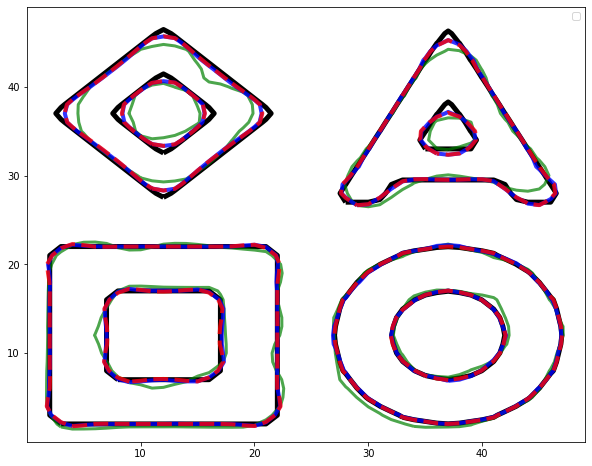

In [131]:
# DTMOF
nn = h5py.File('MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn = np.array(nn['phi'][str_frame])


# BFGS
bfgs = h5py.File('MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs = np.array(bfgs['phi'][str_frame])


# ELVIRA
elvira = h5py.File('ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira = np.array(elvira['phi'][str_frame])


# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init = np.transpose(np.array(init['phi']['init']))
init.close()
x1,y1 =np.meshgrid(np.arange(50)+0.5/50.0,np.arange(50)+0.5/50.0)
# x2,y2 =np.meshgrid(np.arange(200)/4.0+0.5/50.0,np.arange(200)/4.0+0.5/50.0)

plt.contour(x1,y1,phi_init[:,:,12],levels=[0.5],colors='k',linewidths=5)
plt.contour(x1,y1,np.transpose(phi_elvira[12,:,:]),levels=[0.5],colors='g',linewidths=3,alpha=0.7)
plt.contour(x1,y1,np.transpose(phi_nn[12,:,:]),levels=[0.5],colors='b',linewidths=4,alpha=0.8)
plt.contour(x1,y1,np.transpose(phi_bfgs[12,:,:]),levels=[0.5],colors='r',linestyles='dashed',linewidths=4,alpha=0.8)

# plt.contour(x1,y1,phi_init[:,:,12],levels=[0.5],colors='r',alpha=0.5)
plt.legend()


In [133]:
init = h5py.File(input_data_file,'r')
init.keys()

OSError: Unable to open file (unable to open file: name = '../inputs/input.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)